Found 4377 images belonging to 4 classes.
Found 1469 images belonging to 4 classes.
=== DISTRIBUȚIA CLASELOR ===
Clase găsite: ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'squamous_cell_carcinoma']
Total imagini train: 4377
Total imagini validare: 1469

--- TRAIN ---
adenocarcinoma: 1051 imagini (24.0%)
large_cell_carcinoma: 1044 imagini (23.9%)
normal: 1056 imagini (24.1%)
squamous_cell_carcinoma: 1226 imagini (28.0%)

--- VALIDARE ---
adenocarcinoma: 368 imagini (25.1%)
large_cell_carcinoma: 369 imagini (25.1%)
normal: 337 imagini (22.9%)
squamous_cell_carcinoma: 395 imagini (26.9%)

=== VERIFICARE DIRECTĂ DIN DIRECTOARE ===

--- TRAIN (Total: 4377) ---
adenocarcinoma: 1051 imagini (24.0%)
large_cell_carcinoma: 1044 imagini (23.9%)
normal: 1056 imagini (24.1%)
squamous_cell_carcinoma: 1226 imagini (28.0%)

--- VALIDARE (Total: 1469) ---
adenocarcinoma: 368 imagini (25.1%)
large_cell_carcinoma: 369 imagini (25.1%)
normal: 337 imagini (22.9%)
squamous_cell_carcinoma: 395 imagi

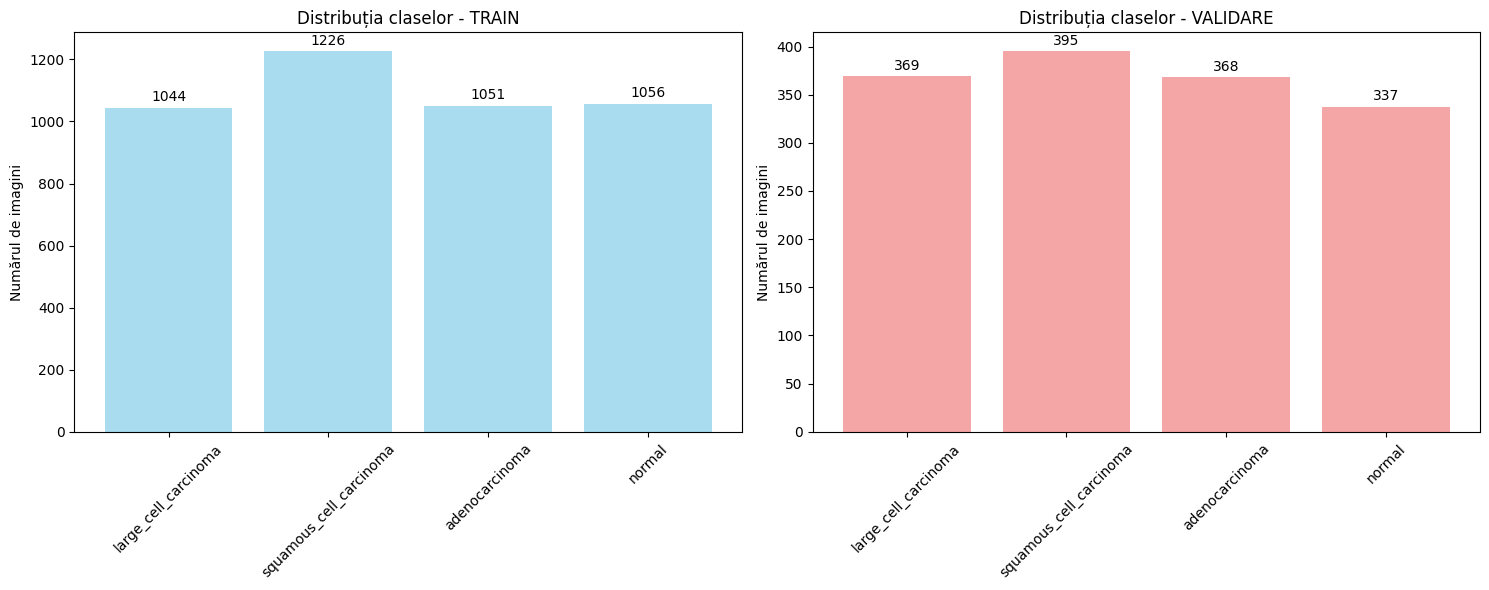


=== ANALIZĂ BALANSARE ===
Raport balansare TRAIN: 0.852 (1.0 = perfect balansat)
Raport balansare VALIDARE: 0.853 (1.0 = perfect balansat)
Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5267 - auc: 0.7927 - loss: 14.4748 - precision: 0.5679 - recall: 0.4522 - val_accuracy: 0.2852 - val_auc: 0.5154 - val_loss: 13.7516 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.7508 - auc: 0.9349 - loss: 12.3491 - precision: 0.7810 - recall: 0.7263 - val_accuracy: 0.2512 - val_auc: 0.5146 - val_loss: 12.5850 - val_precision: 0.1391 - val_recall: 0.0619 - learning_rate: 1.0000e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.8542 - auc: 0.9733 - loss: 10.4850 - precision: 0.8677 - recall: 0.8436 - val_accuracy: 0.2512 - val_auc: 0.5119 - val_loss: 11.0342 - val_precision: 0.2570 - val_recall: 0.2049 - learning_rate: 1.0000e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 1. Creare augmentare
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Mărit
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # Adăugat
    brightness_range=[0.7, 1.3],  # Adăugat
    fill_mode='constant'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

BASE_DIR = os.path.join('..', 'dataset', 'preprocessed_dataset')
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')

# Creează generatoarele
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# === METODA 1: Folosind generatoarele ===
print("=== DISTRIBUȚIA CLASELOR ===")
print(f"Clase găsite: {list(train_generator.class_indices.keys())}")
print(f"Total imagini train: {train_generator.samples}")
print(f"Total imagini validare: {validation_generator.samples}")

# Numără imaginile per clasă din generator
train_class_counts = Counter(train_generator.classes)
valid_class_counts = Counter(validation_generator.classes)

print("\n--- TRAIN ---")
for class_idx, count in sorted(train_class_counts.items()):
    class_name = list(train_generator.class_indices.keys())[class_idx]
    percentage = (count / train_generator.samples) * 100
    print(f"{class_name}: {count} imagini ({percentage:.1f}%)")

print("\n--- VALIDARE ---")
for class_idx, count in sorted(valid_class_counts.items()):
    class_name = list(validation_generator.class_indices.keys())[class_idx]
    percentage = (count / validation_generator.samples) * 100
    print(f"{class_name}: {count} imagini ({percentage:.1f}%)")

# === METODA 2: Verificare directă din directoare ===
def count_images_in_directories(base_dir):
    """Numără imaginile direct din directoare"""
    distribution = {}
    total = 0
    
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            # Numără doar fișierele imagine
            image_files = [f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
            count = len(image_files)
            distribution[class_name] = count
            total += count
    
    return distribution, total

print("\n=== VERIFICARE DIRECTĂ DIN DIRECTOARE ===")
train_dist, train_total = count_images_in_directories(TRAIN_DIR)
valid_dist, valid_total = count_images_in_directories(VALID_DIR)

print(f"\n--- TRAIN (Total: {train_total}) ---")
for class_name, count in sorted(train_dist.items()):
    percentage = (count / train_total) * 100
    print(f"{class_name}: {count} imagini ({percentage:.1f}%)")

print(f"\n--- VALIDARE (Total: {valid_total}) ---")
for class_name, count in sorted(valid_dist.items()):
    percentage = (count / valid_total) * 100
    print(f"{class_name}: {count} imagini ({percentage:.1f}%)")

# === VIZUALIZARE GRAFICĂ ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafic pentru train
classes = list(train_dist.keys())
train_counts = [train_dist[cls] for cls in classes]
ax1.bar(classes, train_counts, color='skyblue', alpha=0.7)
ax1.set_title('Distribuția claselor - TRAIN')
ax1.set_ylabel('Numărul de imagini')
ax1.tick_params(axis='x', rotation=45)

# Adaugă valorile pe bare
for i, v in enumerate(train_counts):
    ax1.text(i, v + max(train_counts)*0.01, str(v), ha='center', va='bottom')

# Grafic pentru validare
valid_counts = [valid_dist[cls] for cls in classes]
ax2.bar(classes, valid_counts, color='lightcoral', alpha=0.7)
ax2.set_title('Distribuția claselor - VALIDARE')
ax2.set_ylabel('Numărul de imagini')
ax2.tick_params(axis='x', rotation=45)

for i, v in enumerate(valid_counts):
    ax2.text(i, v + max(valid_counts)*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== ANALIZĂ BALANSARE ===")
# Calculează raportul cel mai mic/cel mai mare pentru fiecare set
train_min, train_max = min(train_counts), max(train_counts)
valid_min, valid_max = min(valid_counts), max(valid_counts)

train_balance_ratio = train_min / train_max if train_max > 0 else 0
valid_balance_ratio = valid_min / valid_max if valid_max > 0 else 0

print(f"Raport balansare TRAIN: {train_balance_ratio:.3f} (1.0 = perfect balansat)")
print(f"Raport balansare VALIDARE: {valid_balance_ratio:.3f} (1.0 = perfect balansat)")

if train_balance_ratio < 0.5:
    print("ATENȚIE: Setul de train pare foarte nebalansat!")
if valid_balance_ratio < 0.5:
    print("ATENȚIE: Setul de validare pare foarte nebalansat!")

# 3. Încărcare model cu regularizări
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg'  # Înlocuiește nevoia de GlobalAveragePooling
)

# 4. Arhitectură îmbunătățită
x = base_model.output
x = layers.Dropout(0.5)(x)  # Adăugat dropout
x = layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)  # Adăugat
predictions = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

# 5. Callbacks pentru antrenament mai bun
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
]

# 6. Compilare cu optimizator îmbunătățit
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

# 7. Antrenament în două faze mai bine definit
# Faza 1 - Doar straturi noi
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Mărit
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks
)

# Faza 2 - Fine-tuning
for layer in base_model.layers[-30:]:  # Dezghețăm mai multe straturi
    layer.trainable = True

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Mai multe epoci
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks
)

model.save('model_nou.keras')

In [13]:
import os
import cv2
import numpy as np
from collections import defaultdict
from pathlib import Path
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

IMG_SIZE = (224, 224)
CLASS_NAMES = ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'squamous_cell_carcinoma']

class LungCancerClassifier:
    def __init__(self, model_path=None):
        self.model = load_model(model_path) if model_path else None
    
    def preprocess_image(self, img_path):
        """
        Preprocesează o imagine pentru predicție
        """
        img = cv2.imread(str(img_path))
        if img is None:
            return None
        
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0  # Normalizare
        return np.expand_dims(img, axis=0)  # Adaugă dimensiunea batch

    def predict_image(self, img_path):
        """
        Realizează predicția pe o imagine
        Returnează un dicționar cu rezultate sau ridică excepții descriptive
        """
        if self.model is None:
            raise ValueError("Modelul nu a fost încărcat! Folosește constructorul cu calea către model.")
    
        if not Path(img_path).exists():
            raise FileNotFoundError(f"Fișierul {img_path} nu există!")
    
        if not Path(img_path).is_file():
            raise ValueError(f"{img_path} nu este un fișier valid!")
    
        try:
            img = cv2.imread(str(img_path))
            if img is None:
                raise ValueError(f"Nu am putut încărca imaginea {img_path}. Verifică dacă este un format valid (jpg, png etc.)")
        
            img = cv2.resize(img, IMG_SIZE)
            if img.size == 0:
                raise ValueError("Imaginea rezultată după redimensionare este goală!")
        
            img = img / 255.0
            processed_img = np.expand_dims(img, axis=0)
        
            predictions = self.model.predict(processed_img)
            if predictions.size == 0:
                raise ValueError("Modelul nu a returnat nicio predicție!")
        
            predicted_class = np.argmax(predictions, axis=1)[0]
        
            return {
                'class': CLASS_NAMES[predicted_class],
                'confidence': float(np.max(predictions)),
                'probabilities': {cls: float(prob) for cls, prob in zip(CLASS_NAMES, predictions[0])}
            }
        
        except Exception as e:
            raise RuntimeError(f"Eroare la procesarea imaginii {img_path}: {str(e)}")


def check_class(classifier, image_path):
    test_image_path = image_path
    result = classifier.predict_image(test_image_path)
    
    if result:
        print("\nRezultate predicție:")
        print(f"Clasă prezisă: {result['class']}")
        print(f"Încredere: {result['confidence']:.2%}")
        print("Probabilități:")
        for cls, prob in result['probabilities'].items():
            print(f" - {cls}: {prob:.2%}")
    else:
        print("Imaginea nu a putut fi încărcată sau procesată.")


# Exemplu de utilizare:
if __name__ == "__main__":
    MODEL_PATH = './model_nou.keras'

    # 2. Utilizare model pentru predicție
    classifier = LungCancerClassifier(MODEL_PATH)
    
    # normal
    check_class(classifier, '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/normal/aug_3_2.png')
    # large cell carcinoma
    check_class(classifier, '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/large_cell_carcinoma/aug_0_000021.png')
    # adenocarcinoma
    check_class(classifier, '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/adenocarcinoma/aug_3_000061.png')
    # squamous cell carcinoma
    check_class(classifier, '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/squamous_cell_carcinoma/aug_2_000124.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step

Rezultate predicție:
Clasă prezisă: normal
Încredere: 100.00%
Probabilități:
 - adenocarcinoma: 0.00%
 - large_cell_carcinoma: 0.00%
 - normal: 100.00%
 - squamous_cell_carcinoma: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Rezultate predicție:
Clasă prezisă: large_cell_carcinoma
Încredere: 100.00%
Probabilități:
 - adenocarcinoma: 0.00%
 - large_cell_carcinoma: 100.00%
 - normal: 0.00%
 - squamous_cell_carcinoma: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Rezultate predicție:
Clasă prezisă: adenocarcinoma
Încredere: 100.00%
Probabilități:
 - adenocarcinoma: 100.00%
 - large_cell_carcinoma: 0.00%
 - normal: 0.00%
 - squamous_cell_carcinoma: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Rezultate predicție:
Clasă prezisă: squamous_cell_carcinoma
Încredere: 100.00%
Probabilități:
 - adenocarcinoma: 0.00%
 - large_cell_carcinoma: 0.00%
 - normal: 0.00%
 - squamous_cell_carcinoma: 100.00%
